Instructions

In this problem, you will forecast the outcome of a portfolio of loans.
Each loan is scheduled to be repaid over 3 years and is structured as follows:
First, the borrower receives the funds. This event is called origination.
The borrower then makes regular repayments, until one of the following happens:
a) The borrower stops making payments, typically due to financial hardship,
   before the end of the 3-year term. This event is called charge-off, and the loan is then said to have charged off.

b) The borrower continues making repayments until 3 years after the origination date.
   At this point, the debt has been fully repaid.

In the attached CSV, each row corresponds to a loan, and the columns are defined as follows:
The column with header days since origination indicates the number of days that elapsed between
origination and the date when the data was collected.
For loans that charged off before the data was collected, the column with header days from origination
to charge-off indicates the number of days that elapsed between origination and charge-off.
For all other loans, this column is blank.

Objective:
We would like you to estimate what fraction of these loans will have charged off by the time all
of their 3-year terms are finished. Please include a rigorous explanation of how you arrived at your answer,
and include any code you used. You may make simplifying assumptions, but please state such assumptions explicitly.
Feel free to present your answer in and Jupyter Notebook. Please push Your work to Yours GitHub repository.
Also, we expect that this project will not take more than 3–6 hours of your time.

Comments and Remarks:
The dataset here is complex (has 50,000 rows and 2 columns; and lots of missing values), and the problem is not very straightforward.
You have to examine the dataset critically and then decide what model to use.

In [238]:
# Import python libraries and data , show basic information about data  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [239]:

loan_timing = pd.read_csv("Test2/Test2_loan_timing.csv")

In [240]:
loan_timing.head()

,days since origination,days from origination to chargeoff
0,109,NaN
1,679,NaN
2,723,NaN
3,509,NaN
4,254,NaN


In [241]:
loan_timing.describe()

,days since origination,days from origination to chargeoff
count,50000.000000,3305.000000
mean,365.844760,214.852345
std,210.965114,165.233874
min,0.000000,0.000000
25%,183.000000,76.000000
50%,366.000000,180.000000
75%,549.000000,323.000000
max,730.000000,725.000000


In [242]:
loan_timing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   days since origination              50000 non-null  int64  
 1   days from origination to chargeoff  3305 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 781.4 KB


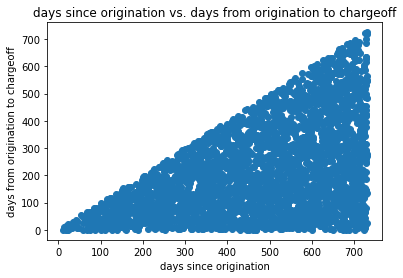

In [243]:
# First, I created some plots to better understand the data.  

x = loan_timing['days since origination']
y = loan_timing['days from origination to chargeoff']
plt.scatter(x, y) 
plt.title("days since origination vs. days from origination to chargeoff")
plt.xlabel("days since origination")
plt.ylabel("days from origination to chargeoff")
plt.show()

# The plot below indicates the relationship between the days since origination and the days to charged-off.  

In [244]:
# I divided the imported data into two susbsets.  
# loan_timing =>  data for charged-off 
# loan_active => data for active loans 

# This is an atypical dataset with a small number of columns to investigate and many NaN values but I decided to use
# the classification algorithm anyway.
# I think it is definitely a classification problem i.e. for Logistic Regression algorithm. 
# I added a new variable chargeoff => binary, which indicates 1=> chargeoff , 0 => active loan
# I changed the name for variable 'days from origination to chargeoff' to 'days' and replace NaN values with the value 
# from column 'days since origination' 

loan_timing['chargeoff'] = np.where(pd.notnull(loan_timing[['days from origination to chargeoff']]), 1, 0)

loan_timing['days from origination to chargeoff'] = np.where(pd.notnull(loan_timing[['days from origination to chargeoff']]), loan_timing[['days from origination to chargeoff']], loan_timing[['days since origination']])
loan_timing.rename(columns={"days from origination to chargeoff": "days"}, inplace=True)

In [245]:
loan_chargeoff = loan_timing[loan_timing['chargeoff'] == 1] 

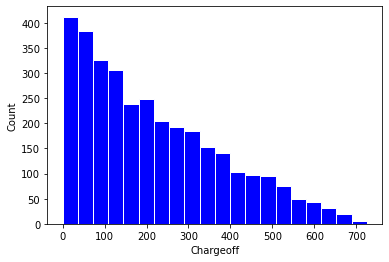

In [246]:
x = loan_chargeoff['days']

plt.hist(x, density=False, bins=20, ec='white', color='blue') 
plt.ylabel('Count')
plt.xlabel('Chargeoff');

# The plot below illustrates that the loans that charged-off decrease with increasing time.
# This allows me to conclude that the longer the loan active, the lower the risk to charged-off. 

In [247]:
loan_active = loan_timing[loan_timing['chargeoff'] == 0] 
loan_active

,days since origination,days,chargeoff
0,109,109.0,0
1,679,679.0,0
2,723,723.0,0
3,509,509.0,0
4,254,254.0,0
...,...,...,...
49995,253,253.0,0
49996,664,664.0,0
49997,209,209.0,0
49998,214,214.0,0


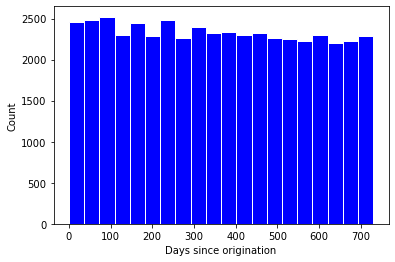

In [248]:
x = loan_active['days']

plt.hist(x, density=False, bins=20, ec='white', color='blue') 
plt.ylabel('Count')
plt.xlabel('Days since origination');

#The plot below ilustrates the uniformly distributed the all loans.

In [249]:
loan_chargeoff

,days since origination,days,chargeoff
14,327,78.0,1
15,400,390.0,1
16,721,362.0,1
26,410,48.0,1
61,649,412.0,1
...,...,...,...
49937,661,167.0,1
49947,520,89.0,1
49980,356,107.0,1
49981,280,192.0,1


In [250]:
loan_active

,days since origination,days,chargeoff
0,109,109.0,0
1,679,679.0,0
2,723,723.0,0
3,509,509.0,0
4,254,254.0,0
...,...,...,...
49995,253,253.0,0
49996,664,664.0,0
49997,209,209.0,0
49998,214,214.0,0


In [251]:
# As I mentioned above I decided to use the Logistic Regression model. It is a classification algorithm 
# and the dependent variable is binary. The algorithm gives good results.   
# chargeoff => dependent variable 
# days => independent variable
# prediction on the data where chargeoff is equal to 0

# The maximum 'days since origination' value in the data is 730 so first aff all I estimate the fraction for charged-off 
# loan by the time all of their 1-year terms are finished, next I will do the same for all dataset (730 days ~ 2 years) 
# and at the end I use the Linear Regression model to estimate the fraction all of their 3-years terms are finished.  


# 365 days 
one_year = loan_timing[loan_timing['days'] <= 365] 

X = np.reshape(one_year['days'].values, (-1,1))
y = np.reshape(one_year['chargeoff'].values, (-1,1)).ravel()
lr = linear_model.LogisticRegression().fit(X, y)


In [252]:
X_pred = one_year[one_year['chargeoff'] == 0] 
X_pred =  np.reshape(X_pred['days'].values, (-1,1))

pred_1year =  lr.predict_proba(X_pred) #probabiblity of 1

pred_1year = pred_1year[:,1] # 1  
pred_1year = sum(pred_1year)
pred_1year # predicted count chargeoff 1 

#2374 => 1, 21666 => 0 
#2374 + 21666 + 2657= 26 697 <= check

2373.9145261007297

In [253]:
print(one_year.count())
count = one_year[one_year['chargeoff'] == 1].count()
print(count)


days since origination    26697
days                      26697
chargeoff                 26697
dtype: int64
days since origination    2657
days                      2657
chargeoff                 2657
dtype: int64


In [254]:
# Predicted fraction of charded-off in a 1-year 
# chargeoff = 1 in the 1-year dataset

((2374 + 2657)/26697)*100

18.844814024047647

In [255]:
# 730 days 

two_years = loan_timing 

X = np.reshape(two_years['days'].values, (-1,1))
y = np.reshape(two_years['chargeoff'].values, (-1,1)).ravel()
lr = linear_model.LogisticRegression().fit(X, y)

In [256]:
X_pred = two_years[two_years['chargeoff'] == 0] 
X_pred =  np.reshape(X_pred['days'].values, (-1,1))

pred_2years =  lr.predict_proba(X_pred)
pred_2years = pred_2years[:,1]
pred_2years = sum(pred_2years)
pred_2years # predicted count chargeoff 1 


#2996 => 1 #43699 => 0
# 2996 + 43699 + 3305 = 50 000 <= check 

2995.6550603296646

In [257]:

print(two_years.count())
count = two_years[two_years['chargeoff'] == 1].count()
print(count)


days since origination    50000
days                      50000
chargeoff                 50000
dtype: int64
days since origination    3305
days                      3305
chargeoff                 3305
dtype: int64


In [258]:
# Predicted fraction of charded-off within 2-years

((2996+3305)/50000)*100 

12.601999999999999

In [259]:
# Simple estimate the fraction of charded-off within 3-years

#1095 days 

X = np.reshape( [1,2 ], (-1,1))
y = np.reshape( [18.844814024047647, 12.601999999999999], (-1,1)) 

lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression()

In [260]:
pred_3years = lr.predict(np.reshape( [3], (-1,1)))
pred_3years  # ~ 6.36% .


array([[6.35918598]])